In [ ]:
Project - Student Performance and Attendance Analysis
Analyse student performance and attendance using attached excel file which has 2 tabs in the document
The goal is to:
1.	Calculate total and percentage marks.
2.	Derive attendance percentages.
3.	Classify students based on performance.
4.	Identify students with low attendance and highlight top performers.
5.	Provide visual insights into the data.


In [ ]:
Data Preparation
1.	Load the student marks and attendance data from the provided Excel files into two separate Pandas DataFrames.
2.	Merge the two DataFrames on the Name column to create a single DataFrame.
3.	Replace attendance values ('Y' or 'N') with numeric values (1 for 'Y' and 0 for 'N').
4.	Deal with the missing values.
5.	Do the column cleaning like name column is the combination of upper and lower case

Data Transformation

1.	Create separate columns for below:
o	Total marks for each student.
o	Percentage marks for each student.
o	Attendance percentage for each student based on attendance columns.
o	Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).
o	Use this weighted percentage for further calculations.
                     
2.	Classify each student's performance into categories:
o	"Excellent" for percentages ≥ 85.
o	"Good" for percentages between 71 and 84.
o	"Average" for percentages between 50 and 70.
o	"Needs Improvement" for percentages < 50.
    
Analysis
1.	Identify students with attendance below 75% but weighted percentage >50%.
2.	Highlight the top three students based on percentage marks.
3.	Impact of attendance on Tests/Assignment marks. 
    
Visualization
1.	Create a bar chart displaying weighted percentages for top 5 students.
2.	Create a pie chart showing the distribution of students across the four performance categories.
3.	Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.
4.	Create a chart to show the students where attendance is less than 50%.
5.	Any other visualization/analysis which you can infer from data for the management.

In [2]:
import pandas as pd

In [ ]:
Data Preparation
1.	Load the student marks and attendance data from the provided Excel files into two separate Pandas DataFrames.
2.	Merge the two DataFrames on the Name column to create a single DataFrame.
3.	Replace attendance values ('Y' or 'N') with numeric values (1 for 'Y' and 0 for 'N').
4.	Deal with the missing values.
5.	Do the column cleaning like name column is the combination of upper and lower case

In [25]:
df_marks=pd.read_excel("Student Performance Analysis.xlsx",sheet_name="Marks")
df_marks.head(10)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment
0,Arjun,9,5,14,16.0
1,Sophia Hardy,8,9,113,19.0
2,RAj,10,10,15,20.0
3,Emily,9,7,11,16.0
4,Ishaan Saini,8,7,14,11.0
5,OliviA,9,7,8,15.0
6,Maya,10,10,15,20.0
7,Liam,6,9,13,12.0
8,Ravi Ahuja,10,7,13,14.0
9,James,6,6,10,13.0


In [26]:
df_attendance=pd.read_excel("Student Performance Analysis.xlsx",sheet_name="Attendance")
df_attendance.head(10)

,Name,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,Y,N,N,N,Y
1,Sophia Hardy,Y,N,N,Y,Y
2,RAj,Y,Y,Y,Y,Y
3,Emily,Y,Y,N,Y,Y
4,Ishaan Saini,N,N,N,N,Y
5,James,Y,N,Y,N,N
6,Aarav,Y,Y,Y,N,N
7,Isabella,N,N,N,N,N
8,Karthik Bajaj,N,N,N,N,N
9,Amelia,N,N,N,Y,Y


In [27]:
merged_df=pd.merge(df_marks,df_attendance,on="Name", how='inner')
merged_df.head()

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,Y,N,N,N,Y
1,Sophia Hardy,8,9,113,19.0,Y,N,N,Y,Y
2,RAj,10,10,15,20.0,Y,Y,Y,Y,Y
3,Emily,9,7,11,16.0,Y,Y,N,Y,Y
4,Ishaan Saini,8,7,14,11.0,N,N,N,N,Y


In [28]:
df_attendance = df_attendance.replace({'Y': 1, 'N': 0})
df_attendance.head(10)

C:\Users\amiglani\AppData\Local\Temp\ipykernel_16252\3431313191.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_attendance = df_attendance.replace({'Y': 1, 'N': 0})


,Name,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,1,0,0,0,1
1,Sophia Hardy,1,0,0,1,1
2,RAj,1,1,1,1,1
3,Emily,1,1,0,1,1
4,Ishaan Saini,0,0,0,0,1
5,James,1,0,1,0,0
6,Aarav,1,1,1,0,0
7,Isabella,0,0,0,0,0
8,Karthik Bajaj,0,0,0,0,0
9,Amelia,0,0,0,1,1


In [29]:
merged_df=pd.merge(df_marks, df_attendance, on='Name', how= 'inner')
merged_df.head(5)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,1,0,0,0,1
1,Sophia Hardy,8,9,113,19.0,1,0,0,1,1
2,RAj,10,10,15,20.0,1,1,1,1,1
3,Emily,9,7,11,16.0,1,1,0,1,1
4,Ishaan Saini,8,7,14,11.0,0,0,0,0,1


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              110 non-null    object 
 1   Mini Test 1       109 non-null    object 
 2   Mini Test 2       109 non-null    object 
 3   Live Test         109 non-null    object 
 4   Assignment        109 non-null    float64
 5   Attendance Day 1  110 non-null    int64  
 6   Attendance Day 2  110 non-null    int64  
 7   Attendance Day 3  110 non-null    int64  
 8   Attendance Day 4  110 non-null    int64  
 9   Attendance Day 5  110 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 8.7+ KB


In [31]:
merged_df.isnull().sum()

Name                0
Mini Test 1         1
Mini Test 2         1
Live Test           1
Assignment          1
Attendance Day 1    0
Attendance Day 2    0
Attendance Day 3    0
Attendance Day 4    0
Attendance Day 5    0
dtype: int64

In [32]:
merged_df['Name'] = merged_df['Name'].str.title()
merged_df.head(5)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,1,0,0,0,1
1,Sophia Hardy,8,9,113,19.0,1,0,0,1,1
2,Raj,10,10,15,20.0,1,1,1,1,1
3,Emily,9,7,11,16.0,1,1,0,1,1
4,Ishaan Saini,8,7,14,11.0,0,0,0,0,1


In [33]:
merged_df["Mini Test 1"] = pd.to_numeric(merged_df["Mini Test 1"], errors='coerce')
merged_df["Mini Test 2"] = pd.to_numeric(merged_df["Mini Test 2"], errors='coerce')
merged_df["Live Test"] = pd.to_numeric(merged_df["Live Test"], errors='coerce')
merged_df["Assignment"] = pd.to_numeric(merged_df["Assignment"], errors='coerce')

In [34]:
merged_df.fillna(0, inplace=True)

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              110 non-null    object 
 1   Mini Test 1       110 non-null    float64
 2   Mini Test 2       110 non-null    float64
 3   Live Test         110 non-null    float64
 4   Assignment        110 non-null    float64
 5   Attendance Day 1  110 non-null    int64  
 6   Attendance Day 2  110 non-null    int64  
 7   Attendance Day 3  110 non-null    int64  
 8   Attendance Day 4  110 non-null    int64  
 9   Attendance Day 5  110 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 8.7+ KB


In [ ]:
1.	Create separate columns for below:
o	Total marks for each student.
o	Percentage marks for each student.
o	Attendance percentage for each student based on attendance columns.
o	Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).
o	Use this weighted percentage for further calculations.

In [36]:
merged_df['Total Marks'] = merged_df["Mini Test 1"] + merged_df["Mini Test 2"] + merged_df["Live Test"] + merged_df["Assignment"]
merged_df.head(5)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0


In [37]:
mean_live_test = merged_df['Live Test'].mean()
merged_df.loc[merged_df['Name'] == 'Sophia Hardy', 'Live Test'] = mean_live_test
merged_df["Live Test"] = pd.to_numeric(merged_df["Live Test"], errors='coerce').astype(int)

In [38]:
merged_df['Total Marks'] = merged_df["Mini Test 1"] + merged_df["Mini Test 2"] + merged_df["Live Test"] + merged_df["Assignment"]
merged_df.head(5)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks
0,Arjun,9.0,5.0,14,16.0,1,0,0,0,1,44.0
1,Sophia Hardy,8.0,9.0,12,19.0,1,0,0,1,1,48.0
2,Raj,10.0,10.0,15,20.0,1,1,1,1,1,55.0
3,Emily,9.0,7.0,11,16.0,1,1,0,1,1,43.0
4,Ishaan Saini,8.0,7.0,14,11.0,0,0,0,0,1,40.0


In [39]:
merged_df['Percentage Marks'] = (merged_df['Total Marks'] / 55) * 100
merged_df['Percentage Marks'] = merged_df['Percentage Marks'].round(2)
merged_df.head(5)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Percentage Marks
0,Arjun,9.0,5.0,14,16.0,1,0,0,0,1,44.0,80.00
1,Sophia Hardy,8.0,9.0,12,19.0,1,0,0,1,1,48.0,87.27
2,Raj,10.0,10.0,15,20.0,1,1,1,1,1,55.0,100.00
3,Emily,9.0,7.0,11,16.0,1,1,0,1,1,43.0,78.18
4,Ishaan Saini,8.0,7.0,14,11.0,0,0,0,0,1,40.0,72.73


In [40]:
attendance_columns = ['Attendance Day 1', 'Attendance Day 2', 'Attendance Day 3', 'Attendance Day 4', 'Attendance Day 5']
merged_df['Attendance Percentage'] = (merged_df[attendance_columns].sum(axis=1) / len(attendance_columns)) * 100
merged_df.head(5)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Percentage Marks,Attendance Percentage
0,Arjun,9.0,5.0,14,16.0,1,0,0,0,1,44.0,80.00,40.0
1,Sophia Hardy,8.0,9.0,12,19.0,1,0,0,1,1,48.0,87.27,60.0
2,Raj,10.0,10.0,15,20.0,1,1,1,1,1,55.0,100.00,100.0
3,Emily,9.0,7.0,11,16.0,1,1,0,1,1,43.0,78.18,80.0
4,Ishaan Saini,8.0,7.0,14,11.0,0,0,0,0,1,40.0,72.73,20.0


In [41]:
merged_df['Weighted Percentage'] = (
    merged_df['Attendance Percentage'] * 0.40 +
    merged_df['Mini Test 1'] * 0.10 +
    merged_df['Mini Test 2'] * 0.10 +
    merged_df['Live Test'] * 0.20 +
    merged_df['Assignment'] * 0.20)
merged_df.head(5)
merged_df['Weighted Percentage'] = merged_df['Weighted Percentage'].astype(str).str.rstrip('0').str.rstrip('.')
merged_df['Weighted Percentage'] = pd.to_numeric(merged_df['Weighted Percentage'], errors='ignore')
merged_df.head(5)

C:\Users\amiglani\AppData\Local\Temp\ipykernel_16252\1287459786.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  merged_df['Weighted Percentage'] = pd.to_numeric(merged_df['Weighted Percentage'], errors='ignore')


,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Percentage Marks,Attendance Percentage,Weighted Percentage
0,Arjun,9.0,5.0,14,16.0,1,0,0,0,1,44.0,80.00,40.0,23.4
1,Sophia Hardy,8.0,9.0,12,19.0,1,0,0,1,1,48.0,87.27,60.0,31.9
2,Raj,10.0,10.0,15,20.0,1,1,1,1,1,55.0,100.00,100.0,49.0
3,Emily,9.0,7.0,11,16.0,1,1,0,1,1,43.0,78.18,80.0,39.0
4,Ishaan Saini,8.0,7.0,14,11.0,0,0,0,0,1,40.0,72.73,20.0,14.5


In [46]:
weighted_percentage_series = merged_df['Weighted Percentage']
average_weighted_percentage = weighted_percentage_series.mean()
print(f"Average Weighted Percentage: {average_weighted_percentage}")

Average Weighted Percentage: 25.132727272727273


In [48]:
top_performer = merged_df.loc[merged_df['Weighted Percentage'].idxmax()]

# Print the details of the top performer
print("Top Performer:")
print(f"Name: {top_performer['Name']}")
print(f"Total Marks: {top_performer['Total Marks']}")
print(f"Percentage Marks: {top_performer['Percentage Marks']}")
print(f"Attendance Percentage: {top_performer['Attendance Percentage']}")
print(f"Weighted Percentage: {top_performer['Weighted Percentage']}")
print(f"Performance Category: {top_performer['Performance Category']}")

Top Performer:
Name: Raj
Total Marks: 55.0
Percentage Marks: 100.0
Attendance Percentage: 100.0
Weighted Percentage: 49.0
Performance Category: Excellent


In [ ]:
2.	Classify each student's performance into categories:
o	"Excellent" for percentages ≥ 85.
o	"Good" for percentages between 71 and 84.
o	"Average" for percentages between 50 and 70.
o	"Needs Improvement" for percentages < 50.

In [49]:

def classify_performance(percentage):
  if percentage >= 85:
    return "Excellent"
  elif percentage >= 71:
    return "Good"
  elif percentage >= 50:
    return "Average"
  else:
    return "Needs Improvement"

merged_df['Performance Category'] = merged_df['Percentage Marks'].apply(classify_performance)

merged_df.head(5)


,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Percentage Marks,Attendance Percentage,Weighted Percentage,Performance Category
0,Arjun,9.0,5.0,14,16.0,1,0,0,0,1,44.0,80.00,40.0,23.4,Good
1,Sophia Hardy,8.0,9.0,12,19.0,1,0,0,1,1,48.0,87.27,60.0,31.9,Excellent
2,Raj,10.0,10.0,15,20.0,1,1,1,1,1,55.0,100.00,100.0,49.0,Excellent
3,Emily,9.0,7.0,11,16.0,1,1,0,1,1,43.0,78.18,80.0,39.0,Good
4,Ishaan Saini,8.0,7.0,14,11.0,0,0,0,0,1,40.0,72.73,20.0,14.5,Good


In [ ]:
Analysis
1.	Identify students with attendance below 75% but weighted percentage >50%.
2.	Highlight the top three students based on percentage marks.
3.	Impact of attendance on Tests/Assignment marks. 


In [50]:
# Identify students with attendance below 75% but weighted percentage > 50%
students_below_75_attendance_above_50_weighted = merged_df[(merged_df['Attendance Percentage'] < 75) & (merged_df['Weighted Percentage'] > 50)]
print("Students with attendance below 75% but weighted percentage > 50%:")
print(students_below_75_attendance_above_50_weighted[['Name', 'Attendance Percentage', 'Weighted Percentage']])


Students with attendance below 75% but weighted percentage > 50%:
Empty DataFrame
Columns: [Name, Attendance Percentage, Weighted Percentage]
Index: []


In [51]:
top_three_students = merged_df.sort_values('Percentage Marks', ascending=False).head(3)
print("Top Three Students Based on Percentage Marks:")
print(top_three_students[['Name', 'Percentage Marks']])

Top Three Students Based on Percentage Marks:
         Name  Percentage Marks
2         Raj            100.00
6        Maya            100.00
69  Mackenzie             94.55


In [52]:
# Impact of attendance on Tests/Assignment marks. 
correlation = merged_df['Attendance Percentage'].corr(merged_df['Weighted Percentage'])
print(f"Correlation between Attendance Percentage and Weighted Percentage: {correlation}")

Correlation between Attendance Percentage and Weighted Percentage: 0.9874045555511944


In [ ]:
Visualization
1.	Create a bar chart displaying weighted percentages for top 5 students.
2.	Create a pie chart showing the distribution of students across the four performance categories.
3.	Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.
4.	Create a chart to show the students where attendance is less than 50%.
5.	Any other visualization/analysis which you can infer from data for the management.

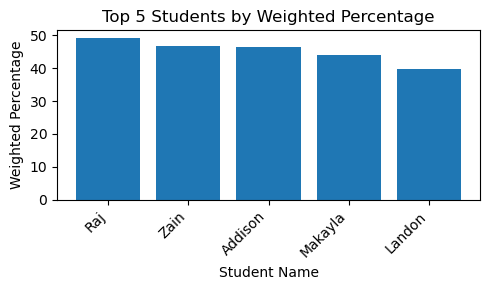

In [53]:
#Create a bar chart displaying weighted percentages for top 5 students.

import matplotlib.pyplot as plt

# Sort the DataFrame by Weighted Percentage in descending order and get the top 5 students
top_5_students = merged_df.sort_values('Weighted Percentage', ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(5, 3))
plt.bar(top_5_students['Name'], top_5_students['Weighted Percentage'])
plt.xlabel('Student Name')
plt.ylabel('Weighted Percentage')
plt.title('Top 5 Students by Weighted Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

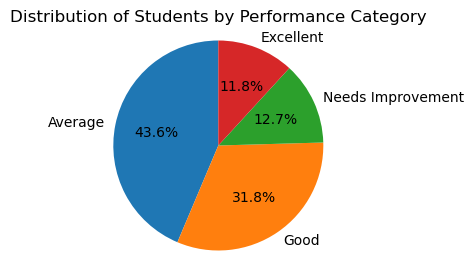

In [54]:
# Create a pie chart showing the distribution of students across the four performance categories.

# Count the number of students in each performance category
performance_counts = merged_df['Performance Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 3))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Students by Performance Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

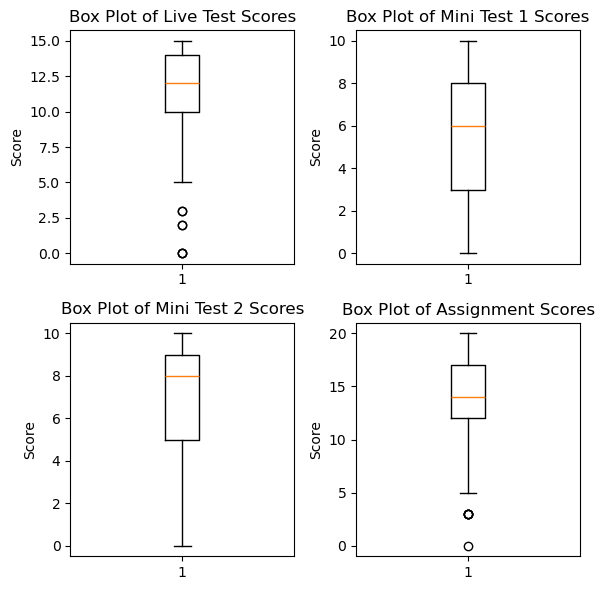

In [56]:
# Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.

# Create box plots for each test
tests = ['Live Test', 'Mini Test 1', 'Mini Test 2', 'Assignment']

plt.figure(figsize=(6, 6))

for i, test in enumerate(tests):
  plt.subplot(2, 2, i + 1)
  plt.boxplot(merged_df[test])
  plt.title(f'Box Plot of {test} Scores')
  plt.ylabel('Score')

plt.tight_layout()
plt.show()


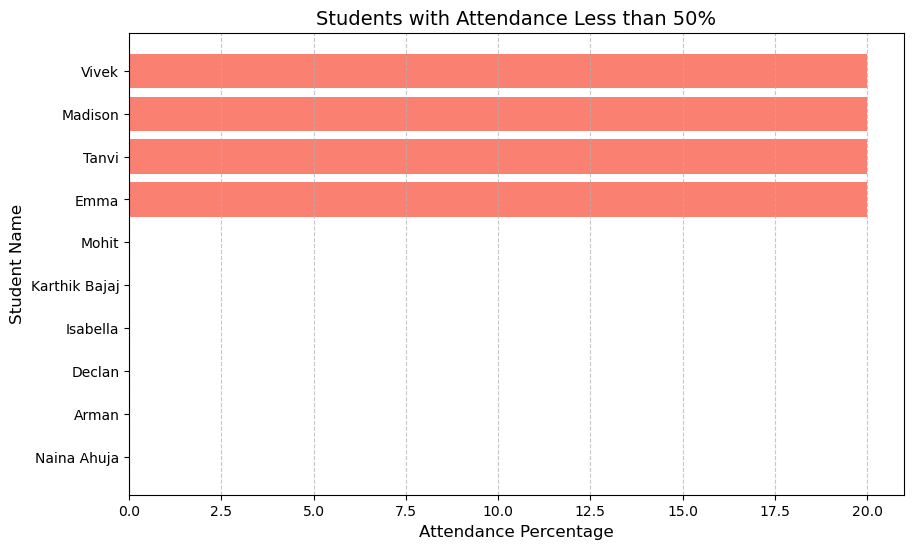

In [75]:
import matplotlib.pyplot as plt
low_attendance_students = merged_df[merged_df['Attendance Percentage'] < 50].sort_values('Attendance Percentage', ascending=True).head(10)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(low_attendance_students['Name'], low_attendance_students['Attendance Percentage'], color='salmon')
plt.xlabel('Attendance Percentage', fontsize=12)
plt.ylabel('Student Name', fontsize=12)
plt.title('Students with Attendance Less than 50%', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(fontsize=10)  # Adjust y-axis tick label font size
plt.show()

Correlation between Attendance Percentage and Weighted Percentage: 0.9874045555511944


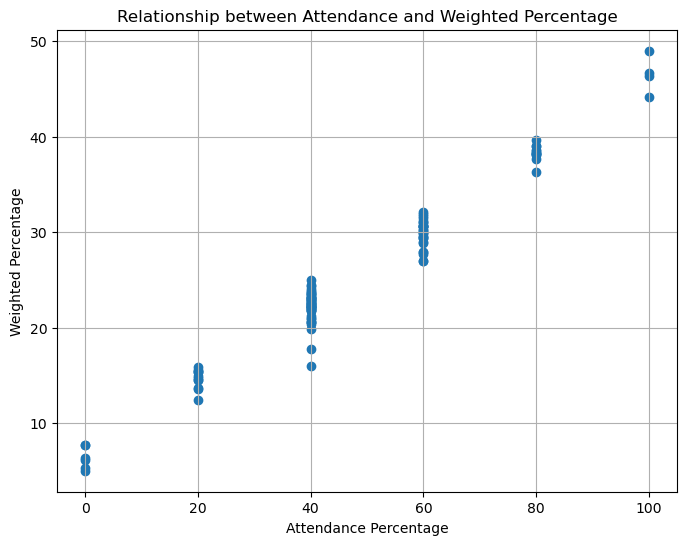

<Figure size 1000x600 with 0 Axes>

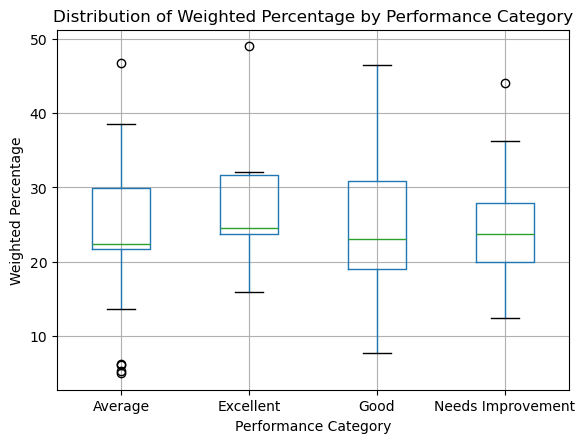

Average Weighted Percentage by Performance Category:
Performance Category
Average              24.754167
Excellent            27.746154
Good                 24.862857
Needs Improvement    24.678571
Name: Weighted Percentage, dtype: float64


<Figure size 1000x600 with 0 Axes>

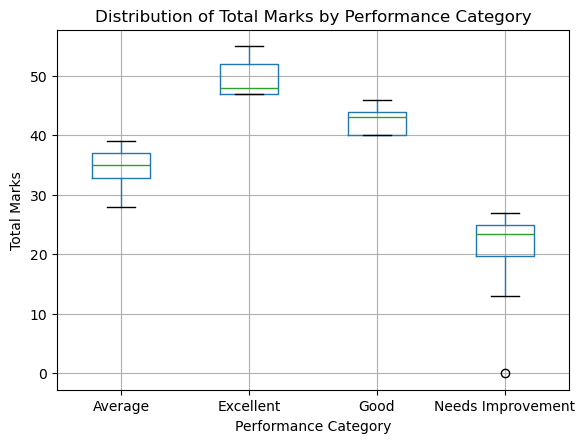

Average Total Marks by Performance Category:


Performance Category
Average              34.750000
Excellent            49.384615
Good                 42.685714
Needs Improvement    21.000000
Name: Total Marks, dtype: float64

In [78]:
#Any other visualization/analysis which you can infer from data for the management.

# Correlation between Attendance Percentage and Weighted Percentage
correlation = merged_df['Attendance Percentage'].corr(merged_df['Weighted Percentage'])
print(f"Correlation between Attendance Percentage and Weighted Percentage: {correlation}")

# Scatter plot to visualize the relationship between Attendance Percentage and Weighted Percentage
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Attendance Percentage'], merged_df['Weighted Percentage'])
plt.xlabel('Attendance Percentage')
plt.ylabel('Weighted Percentage')
plt.title('Relationship between Attendance and Weighted Percentage')
plt.grid(True)
plt.show()

# Analyze the distribution of Weighted Percentage across different performance categories
plt.figure(figsize=(10, 6))
merged_df.boxplot(column='Weighted Percentage', by='Performance Category')
plt.title('Distribution of Weighted Percentage by Performance Category')
plt.suptitle('')  # Remove the default boxplot title
plt.ylabel('Weighted Percentage')
plt.show()

# Analyze the average weighted percentage for each performance category
average_weighted_by_category = merged_df.groupby('Performance Category')['Weighted Percentage'].mean()
print("Average Weighted Percentage by Performance Category:")
print(average_weighted_by_category)

# Analyze the distribution of Total Marks across different performance categories
plt.figure(figsize=(10, 6))
merged_df.boxplot(column='Total Marks', by='Performance Category')
plt.title('Distribution of Total Marks by Performance Category')
plt.suptitle('')  # Remove the default boxplot title
plt.ylabel('Total Marks')
plt.show()

# Analyze the average total marks for each performance category
average_total_marks_by_category = merged_df.groupby('Performance Category')['Total Marks'].mean()
print("Average Total Marks by Performance Category:")
average_total_marks_by_category
